## Lead Scoring Case Study (By Yash Jain)

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. They have appointed me to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers.

### Step 0: Import Necessary Libraries


In [2]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Data Understanding

First, we will examine our data, to extract its fundamental properties -
1. number of columns
2. type of columns
3. size of data 
etc. 

Let us proceed.

In [3]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

The dataset has 9240 records and 37 columns. Now, let us see the name of all columns.

In [5]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Now, let us check the data types on the columns. 

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There is a diverse set of columns we have in our data. Hence, we will first start with cleaning the data, to keep only relevant and useful information.

### Step 2: Data Cleaning and Preparation

In this phase, we will prepare our data to be ready for Exploratory Data Analysis (EDA). It would include the following steps - 

1. Data Type Alignment
2. Null values treatment
3. Incorrect entries treatment
4. Division of columns based on data types.

Let us begin.

#### 2.1. Data Type Alignment

Now, the first step is to check the Data Types. We will study the unique values of each column, and check if the data type is correct or not. Let us do that. 

In [35]:
for colnum in range(leads.shape[1]):
    print("\n-------------\nCol : ",leads.iloc[:,colnum].name,
      "\n\nUnique Values\n\n",leads.iloc[:,colnum].value_counts(),
      "\n\nData Type:",leads.iloc[:,colnum].dtype)


-------------
Col :  Prospect ID 

Unique Values

 Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
8bf76a52-2478-476b-8618-1688e07874ad    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
2a369e35-ca95-4ca9-9e4f-9d27175aa320    1
af465dfc-7204-4130-9e05-33231863c4b5    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
Name: count, Length: 9240, dtype: int64 

Data Type: object

-------------
Col :  Lead Number 

Unique Values

 Lead Number
579533    1
660737    1
660728    1
660727    1
660719    1
         ..
660562    1
660570    1
660608    1
660616    1
660624    1
Name: count, Length: 9240, dtype: int64 

Data Type: int64

-------------
Col :  Lead Origin 

Unique Values

 Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718

Our Data is aligned with their data types ! This is fantastic. Now, let us move towards the next phase - determining the null values. 

#### 2.2. Null Value Analysis

Here, we will find out the number of null values in our data, and eliminate those that have large volumes of null values (>40%).

Let us proceed.

In [54]:
print("Null Values in each column ",
      "\n---------------------------\n",
      round(leads.isnull().sum()/leads.shape[0]*100,2))

Null Values in each column  
---------------------------
 Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazin

We can see there are many values that have large % of null values. Let us filter them, check them and drop them if necessary.

In [55]:
null_1 = round(leads.isnull().sum()/leads.shape[0]*100,2)
null_1 [null_1>40]

Lead Quality                   51.59
Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Score     45.65
dtype: float64

There are 5 columns that have null values >40%. Let us check these first.  

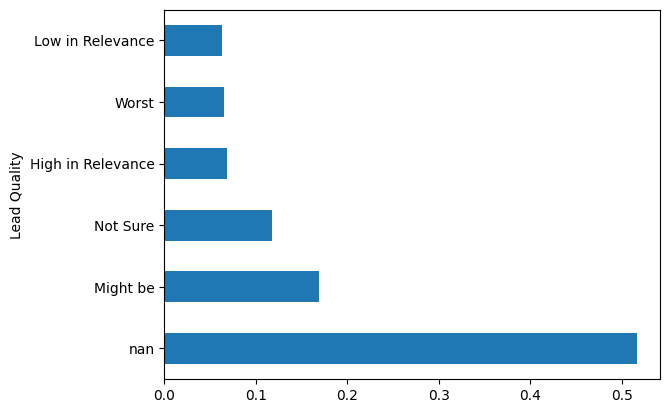

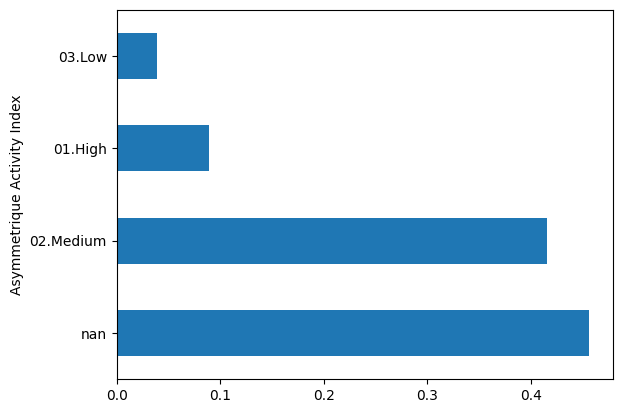

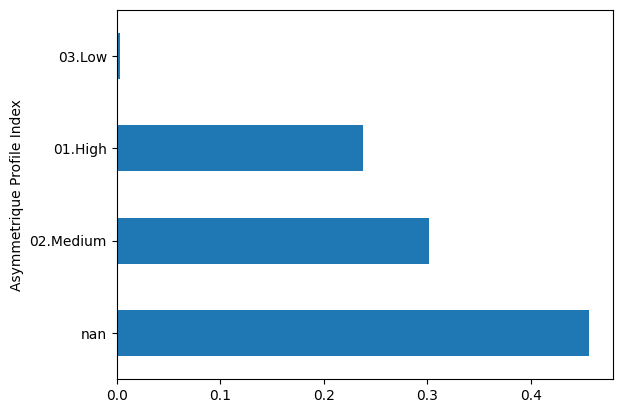

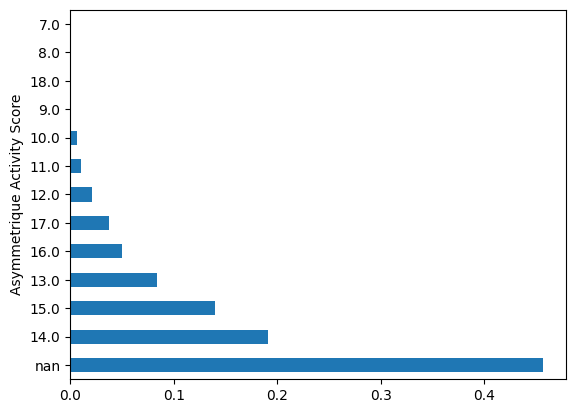

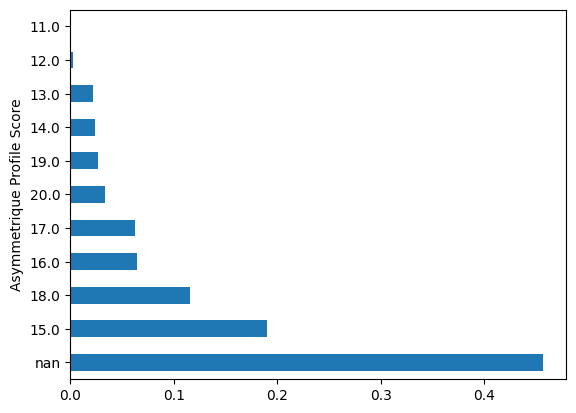

In [106]:
for col in null_1[null_1>40].index:
        leads[col].value_counts(dropna=False,normalize=1).plot(
                kind="barh")
        plt.show()

Based on these charts, we can decide that -

1. Since the second highest count is very less in the columns `Asymmetrique Profile Score`, `Asymmetrique Activity Score` and `Lead Quality`, we can drop these 3 columns entirely.
2. The remaining columns - `Asymmetrique Profile Index` and `Asymmetrique Activity Index` can drop the null rows, but not entire columns.

Let us proceed. 

In [107]:
cols_to_drop = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Lead Quality']
cols_to_nullify = ['Asymmetrique Profile Index','Asymmetrique Activity Index']

In [125]:
leads = leads.drop(cols_to_drop,axis=1).dropna(subset=cols_to_nullify)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        19
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                        87
Total Time Spent on Website                         0
Page Views Per Visit                               87
Last Activity                                      60
Country                                          1289
Specialization                                    772
How did you hear about X Education               1168
What is your current occupation                  1440
What matters most to you in choosing a course    1444
Search                                              0
Magazine                                            0
Newspaper Article           

Now, let us check the null values between 20% and 40% and see how we can address them.

In [130]:
null_2 = round(leads.isnull().sum()/leads.shape[0]*100,2)
null_2 [(null_2>=20) & (null_2<40)]

Country                                          25.67
How did you hear about X Education               23.26
What is your current occupation                  28.67
What matters most to you in choosing a course    28.75
Tags                                             35.03
Lead Profile                                     28.75
dtype: float64

Let us check the distribution for these columns as well. Let us do it now. 

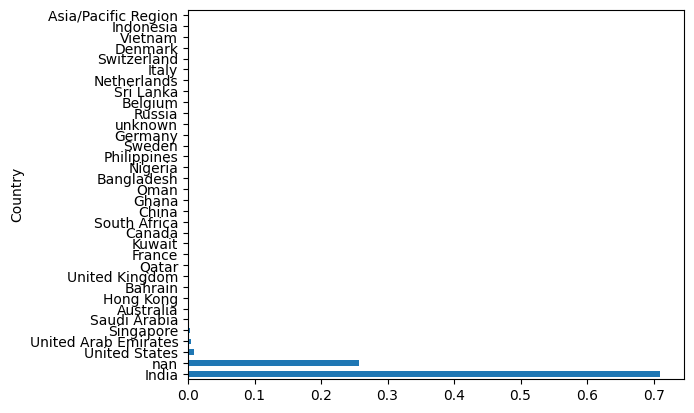

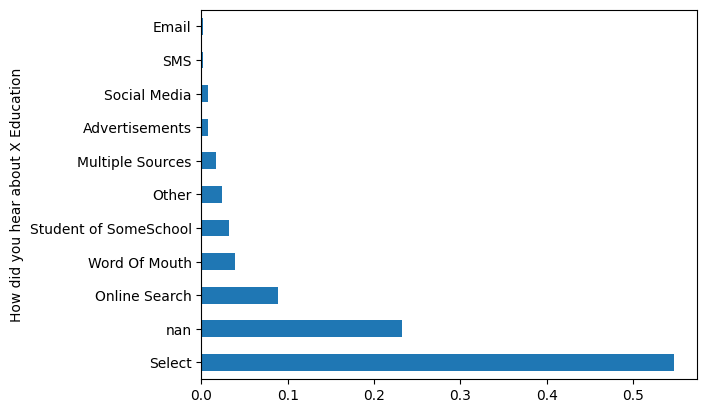

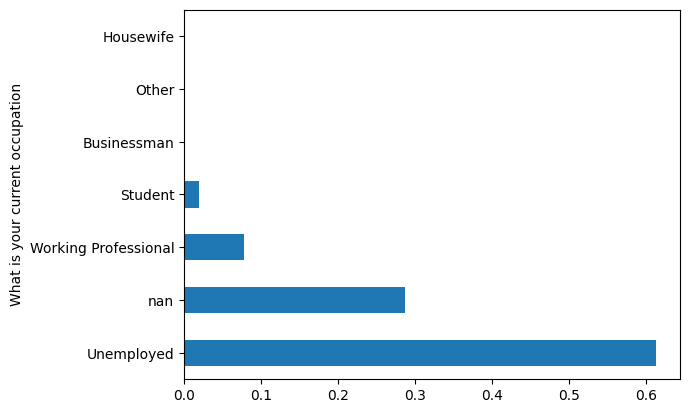

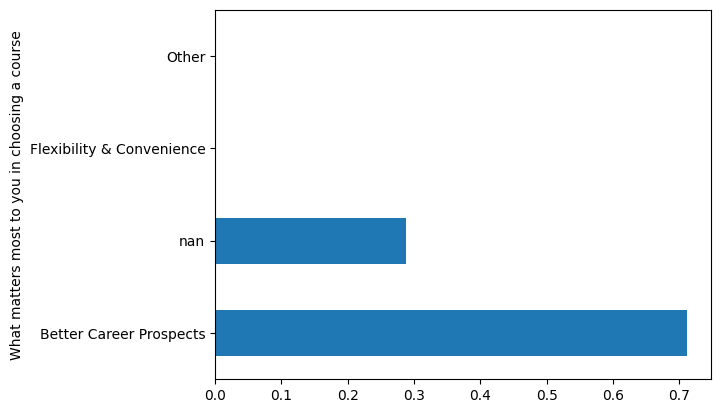

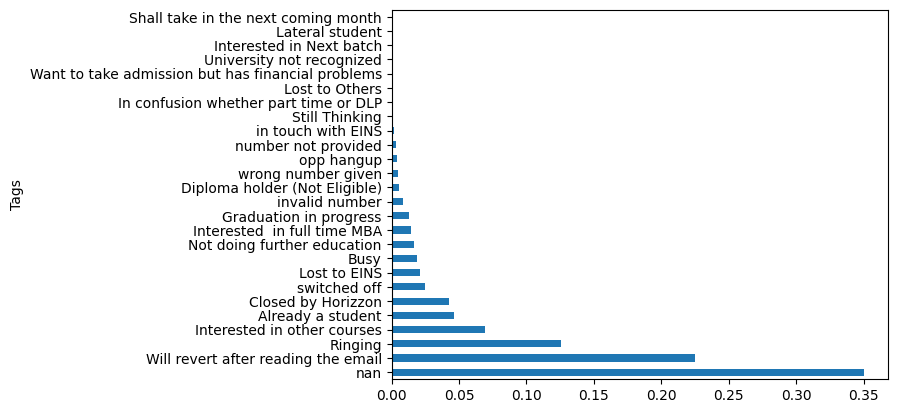

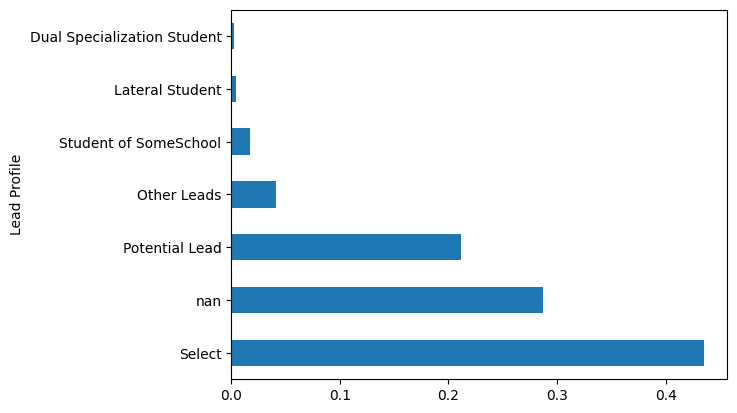

In [132]:
for col in null_2[(null_2>=20) & (null_2<40)].index:
        leads[col].value_counts(dropna=False,normalize=1).plot(
                kind="barh")
        plt.show()

From these charts, we can see that there are categories exceeding the counts of null values. Hence, it is better to drop the null rows from the records for these columns. 

Let us do that. 

In [138]:
leads = leads.dropna(subset=null_2[(null_2>=20) & (null_2 <40)].index)
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

Great ! Our null analysis is now complete. Next step is to treat incorrect entries in the Data. For that, we have to study columns one by one. 

Let us do that. 

#### 2.3. Treatment of Incorrect Entries

Now, let us go through each column, and treat the incorrect entries on them, by thoroughly understanding what each entry means. Let us do that. 

In [143]:
for col in leads.columns:
    print(f"\n________________\ncol name: {col}\n_______________\n")
    print(leads[col].unique())


________________
col name: Prospect ID
_______________

['2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a'
 '0cc2df48-7cf4-4e39-9de9-19797f9b38cc' ...
 '82a7005b-7196-4d56-95ce-a79f937a158d'
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

________________
col name: Lead Number
_______________

[660728 660727 660719 ... 579546 579545 579533]

________________
col name: Lead Origin
_______________

['API' 'Landing Page Submission' 'Lead Add Form']

________________
col name: Lead Source
_______________

['Organic Search' 'Direct Traffic' 'Google' 'Referral Sites' 'Olark Chat'
 'Pay per Click Ads' 'bing' 'Social Media' 'Reference' 'WeLearn'
 'Welingak Website' 'Press_Release']

________________
col name: Do Not Email
_______________

['No' 'Yes']

________________
col name: Do Not Call
_______________

['No' 'Yes']

________________
col name: Converted
_______________

[0 1]

________________
col name: TotalVisits
___________

Our diagnosis from the above code is - 

1. There are entries named `Select` in columns - `Specialization`, `How did you hear about X Education`, `Lead Profile`, `City` - which mean that the user has not filled any entry. Hence, these entries need to be corrected. 
2. The columns - `Magazine`, `X Education Forums`, `Newspaper`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque` - only have a `No` category in their data, and hence, do not contribute significantly to our analysis. These columns will be dropped. 
3. The columns - `Do not Email`, `Do not Call`, `Search`, `Newspaper Article`, `Digital Advertisement`, `Through Recommendations`, `A free copy of Mastering The Interview` - have `Yes` and `No` categories. These will be converted to binary  - 0 (No) and 1 (Yes). 
4. The columns - Asymmetrique Activity Index, Asymmetrique Profile Index - have ordinal categories. These will be converted to ordinal values. 

Let us start doing it one by one. 

In [203]:
select = ['Specialization','How did you hear about X Education','Lead Profile','City']
only_no = ['Magazine','X Education Forums', 'Newspaper', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
yes_and_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','Digital Advertisement', 
              'Through Recommendations','A free copy of Mastering The Interview']
ordinal = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

We will start with dropping the `No` columns. Let us do that.

In [153]:
leads = leads.drop(only_no,axis=1)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Tags', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Great! Now, it is time to address the `Select` category issue. We will first check all the values having this entry and determine what to do accordingly. 

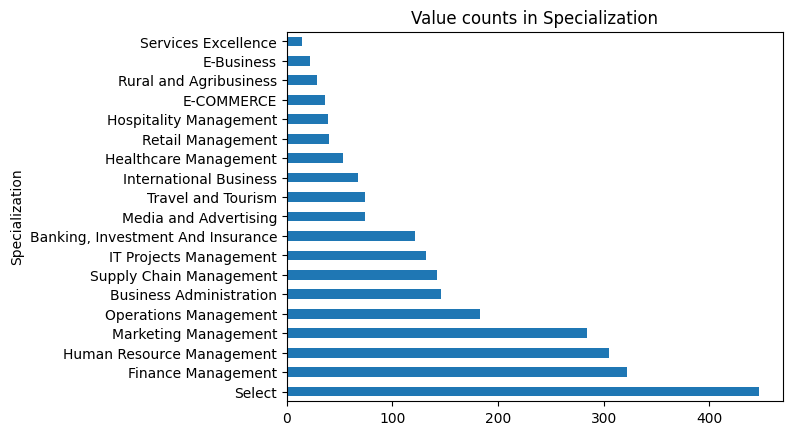

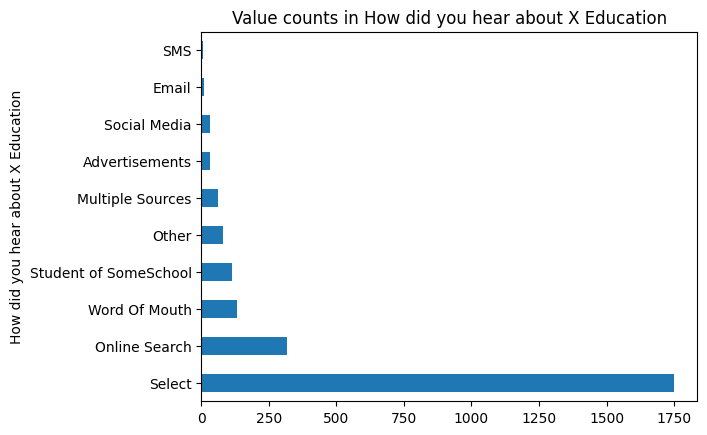

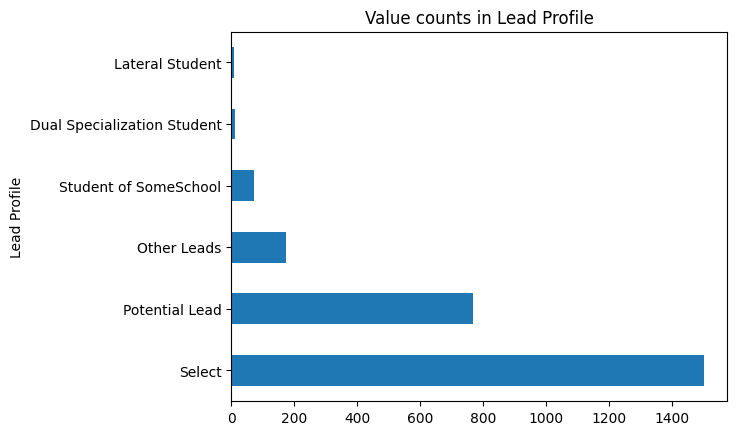

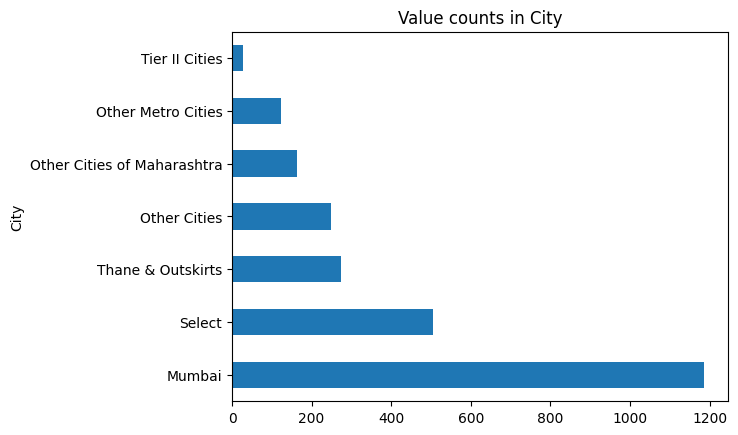

In [156]:
for col in select:
    leads[col].value_counts().plot(kind='barh',title=f'Value counts in {col}')
    plt.show()

Now, let us check for combinations. Let us see how many values are there, which have `SELECT` in all these columns. Let us check now. 

In [157]:
leads[select].value_counts()

Specialization                     How did you hear about X Education  Lead Profile    City          
Select                             Select                              Select          Select            329
Finance Management                 Select                              Select          Mumbai             65
Human Resource Management          Select                              Select          Mumbai             56
Marketing Management               Select                              Select          Mumbai             45
Human Resource Management          Select                              Potential Lead  Mumbai             39
                                                                                                        ... 
Travel and Tourism                 Word Of Mouth                       Potential Lead  Mumbai              1
Banking, Investment And Insurance  Word Of Mouth                       Other Leads     Mumbai              1
                          

We can see that there are 329 entries which are basically blank. Let us drop these first. Then, we will move forward. 

In [174]:
leads = leads.loc[~(leads[select]=='Select').all(axis=1),:]
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,Select,Mumbai,02.Medium,01.High,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,Select,Mumbai,02.Medium,01.High,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,...,No,No,No,Will revert after reading the email,Select,Other Metro Cities,02.Medium,02.Medium,Yes,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,...,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,wrong number given,Potential Lead,Mumbai,02.Medium,01.High,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,invalid number,Potential Lead,Mumbai,02.Medium,01.High,Yes,SMS Sent


In [175]:
leads[select].value_counts()

Specialization                     How did you hear about X Education  Lead Profile    City                       
Finance Management                 Select                              Select          Mumbai                         65
Human Resource Management          Select                              Select          Mumbai                         56
Marketing Management               Select                              Select          Mumbai                         45
Human Resource Management          Select                              Potential Lead  Mumbai                         39
Select                             Select                              Potential Lead  Select                         37
                                                                                                                      ..
Supply Chain Management            Word Of Mouth                       Select          Mumbai                          1
Banking, Investment And Insurance  Sel

Now, we can also see that we have entries where 3 of the 4 columns are empty (input `Select`). This information is also irrelevant to us. Let us drop these as well.  

In [186]:
select_3 = list(set(select)-set(["Lead Profile"]))
leads[select_3].value_counts()

City               How did you hear about X Education  Specialization           
Mumbai             Select                              Finance Management           109
                                                       Human Resource Management    109
                                                       Marketing Management          86
Select             Select                              Select                        66
Mumbai             Select                              IT Projects Management        50
                                                                                   ... 
Thane & Outskirts  Word Of Mouth                       Marketing Management           1
                                                       Select                         1
                                                       Retail Management              1
Tier II Cities     Select                              Supply Chain Management        1
                   Word Of Mouth       

We have 66 entries that have all 3 `Select` values. Let us drop these values as well, since they won't be of any use in our analysis. 

In [189]:
leads = leads.loc[~(leads[select_3]=='Select').all(axis=1),:]
leads[select_3].value_counts()

City               How did you hear about X Education  Specialization           
Mumbai             Select                              Finance Management           109
                                                       Human Resource Management    109
                                                       Marketing Management          86
                                                       IT Projects Management        50
                                                       Operations Management         44
                                                                                   ... 
Thane & Outskirts  Word Of Mouth                       Marketing Management           1
                                                       Select                         1
                                                       Retail Management              1
                                                       Supply Chain Management        1
Tier II Cities     Word Of Mouth       

Great! Now that we have addressed these issues, let us plot the graphs again to see the difference. 

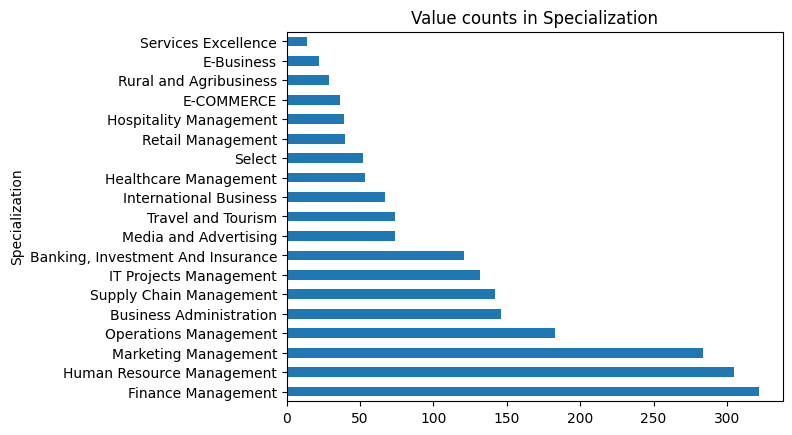

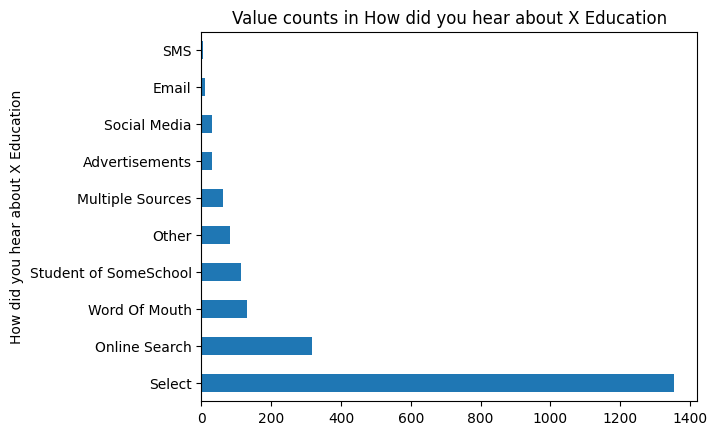

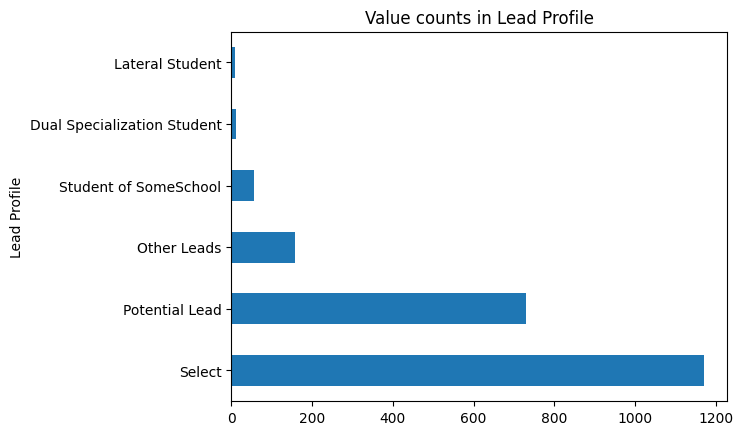

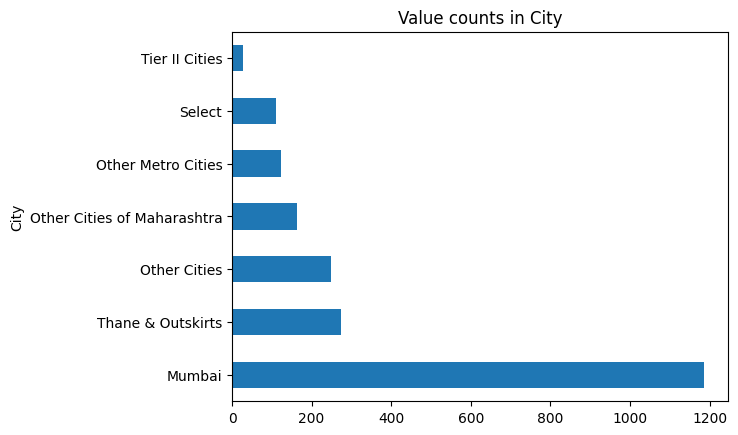

In [190]:
for col in select:
    leads[col].value_counts().plot(kind='barh',title=f'Value counts in {col}')
    plt.show()

We can see that the columns - `Lead Profile` and `How did you hear about X Education` have very large empty values (next best is almost 50% less). Hence, it is better to drop these columns. 

Also, for the remaining columns, we can simply substitute it with the value "Not filled", since the amount is not too high - only around 50-100. 

Let us implement these changes.

In [266]:
leads = leads.drop(["Lead Profile","How did you hear about X Education"],axis=1)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Tags', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [198]:
leads[select] = leads[select].replace("Select","Not filled")
leads[select]

,Specialization,How did you hear about X Education,Lead Profile,City
2,Business Administration,Not filled,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Not filled,Mumbai
4,Not filled,Other,Not filled,Mumbai
6,Supply Chain Management,Online Search,Potential Lead,Mumbai
10,Travel and Tourism,Not filled,Not filled,Other Metro Cities
...,...,...,...,...
9234,Business Administration,Not filled,Potential Lead,Mumbai
9235,IT Projects Management,Not filled,Potential Lead,Mumbai
9236,Media and Advertising,Not filled,Potential Lead,Mumbai
9237,Business Administration,Not filled,Potential Lead,Mumbai


Great! Now, we move towards the binary coding of data. Let us check the columns. 

In [206]:
leads[yes_and_no] = leads[yes_and_no].replace("Yes",1).replace("No",0)
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,...,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,...,0,0,0,Ringing,Not filled,Mumbai,02.Medium,01.High,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,...,0,0,0,Will revert after reading the email,Not filled,Mumbai,02.Medium,01.High,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,...,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,0,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,0,0,1,8.0,1351,8.00,...,0,0,0,Will revert after reading the email,Not filled,Other Metro Cities,02.Medium,02.Medium,1,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,0,0,1,5.0,210,2.50,...,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,0,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,...,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,02.Medium,01.High,0,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,...,0,0,0,wrong number given,Potential Lead,Mumbai,02.Medium,01.High,1,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,...,0,0,0,invalid number,Potential Lead,Mumbai,02.Medium,01.High,1,SMS Sent


Now, let us check if the value counts are appropriate or not. 

In [343]:
for col in yes_and_no:
    print(leads[col].value_counts())

Do Not Email
0    1974
1     161
Name: count, dtype: int64
Do Not Call
0    2134
1       1
Name: count, dtype: int64
Search
0    2133
1       2
Name: count, dtype: int64
Newspaper Article
0    2135
Name: count, dtype: int64
Digital Advertisement
0    2133
1       2
Name: count, dtype: int64
Through Recommendations
0    2133
1       2
Name: count, dtype: int64
A free copy of Mastering The Interview
1    1101
0    1034
Name: count, dtype: int64


Binary coding is completed. Now, let us go towards the ordinal columns. Let us check them.

In [212]:
leads[ordinal]

,Asymmetrique Activity Index,Asymmetrique Profile Index
2,02.Medium,01.High
3,02.Medium,01.High
4,02.Medium,01.High
6,02.Medium,01.High
10,02.Medium,02.Medium
...,...,...
9234,02.Medium,01.High
9235,02.Medium,01.High
9236,02.Medium,01.High
9237,02.Medium,01.High


The order in these categories is as follows - 

1. High
2. Medium
3. Low

The order is High > Medium > Low. Let us do it now. For this, we first need to remove the numbers from the values. Then, we will create an ordered data type and cast the columns to it. 

In [242]:
leads[ordinal] = leads[ordinal].apply(lambda x: x.str.replace(r'^\d{2}\.\s*', '', regex=True))
leads[ordinal]

,Asymmetrique Activity Index,Asymmetrique Profile Index
2,Medium,High
3,Medium,High
4,Medium,High
6,Medium,High
10,Medium,Medium
...,...,...
9234,Medium,High
9235,Medium,High
9236,Medium,High
9237,Medium,High


In [254]:
from pandas.api.types import CategoricalDtype as CustomCatD

ordered_category = CustomCatD(categories=['Low','Medium','High'],ordered=True)
leads[ordinal] = leads[ordinal].astype(ordered_category)
leads[ordinal[0]]

2       Medium
3       Medium
4       Medium
6       Medium
10      Medium
         ...  
9234    Medium
9235    Medium
9236    Medium
9237    Medium
9239    Medium
Name: Asymmetrique Activity Index, Length: 2135, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Great! All the incorrect entries are addressed now. Let us see the information on our dataset. 

In [255]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 2 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    2135 non-null   object  
 1   Lead Number                                    2135 non-null   int64   
 2   Lead Origin                                    2135 non-null   object  
 3   Lead Source                                    2135 non-null   object  
 4   Do Not Email                                   2135 non-null   int64   
 5   Do Not Call                                    2135 non-null   int64   
 6   Converted                                      2135 non-null   int64   
 7   TotalVisits                                    2135 non-null   float64 
 8   Total Time Spent on Website                    2135 non-null   int64   
 9   Page Views Per Visit                          

Perfect! Now, let us classify our columns into their data types, and then we will start with the EDA. 

#### 2.4. Data Types Classification

Now, we will first check the various data types we have in our dataset. We have already done some preliminary classification before, while treating the incorrect entries. 

Let us check now. 

In [267]:
leads.dtypes

Prospect ID                                        object
Lead Number                                         int64
Lead Origin                                        object
Lead Source                                        object
Do Not Email                                        int64
Do Not Call                                         int64
Converted                                           int64
TotalVisits                                       float64
Total Time Spent on Website                         int64
Page Views Per Visit                              float64
Last Activity                                      object
Country                                            object
Specialization                                     object
What is your current occupation                    object
What matters most to you in choosing a course      object
Search                                              int64
Newspaper Article                                   int64
Digital Advert

Let us check the preliminary classification we did. 

In [268]:
print(f"Ordinal ({len(ordinal)}): {ordinal}\nBinary ({len(yes_and_no)}): {yes_and_no}")

Ordinal (2): ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']
Binary (7): ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


Great. Now, let us create further classifications, and sum up with dictionary of these classifications. 

In [282]:
Lead_info = ['Lead Origin','Lead Source','Last Activity','What matters most to you in choosing a course',
            'Tags','Last Notable Activity']
demographics = ['Country','City','What is your current occupation','Specialization']
binary = yes_and_no+['Converted']
numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [283]:
data_types = {'lead_info':Lead_info,
              'demographics': demographics,
              "binary": binary,
              "numeric": numeric,
              "ordinal":ordinal}

data_types

{'lead_info': ['Lead Origin',
  'Lead Source',
  'Last Activity',
  'What matters most to you in choosing a course',
  'Tags',
  'Last Notable Activity'],
 'demographics': ['Country',
  'City',
  'What is your current occupation',
  'Specialization'],
 'binary': ['Do Not Email',
  'Do Not Call',
  'Search',
  'Newspaper Article',
  'Digital Advertisement',
  'Through Recommendations',
  'A free copy of Mastering The Interview',
  'Converted'],
 'numeric': ['TotalVisits',
  'Total Time Spent on Website',
  'Page Views Per Visit'],
 'ordinal': ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']}

Great! Our data is ready for EDA. Let us move ahead now.

### Step 3: Exploratory Data Analysis (EDA)

It is time to conduct our EDA now. Let us start with exploring our data with the different data types. We will start by referencing the data types dictionary. 

In [284]:
data_types

{'lead_info': ['Lead Origin',
  'Lead Source',
  'Last Activity',
  'What matters most to you in choosing a course',
  'Tags',
  'Last Notable Activity'],
 'demographics': ['Country',
  'City',
  'What is your current occupation',
  'Specialization'],
 'binary': ['Do Not Email',
  'Do Not Call',
  'Search',
  'Newspaper Article',
  'Digital Advertisement',
  'Through Recommendations',
  'A free copy of Mastering The Interview',
  'Converted'],
 'numeric': ['TotalVisits',
  'Total Time Spent on Website',
  'Page Views Per Visit'],
 'ordinal': ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']}

In [285]:
leads[ordinal].describe()

,Asymmetrique Activity Index,Asymmetrique Profile Index
count,2135,2135
unique,3,3
top,Medium,High
freq,1751,1435


In [286]:
leads[binary].describe()

,Do Not Email,Do Not Call,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Converted
count,2135.000000,2135.000000,2135.000000,2135.0,2135.000000,2135.000000,2135.000000,2135.000000
mean,0.075410,0.000468,0.000937,0.0,0.000937,0.000937,0.515691,0.473068
std,0.264113,0.021642,0.030599,0.0,0.030599,0.030599,0.499871,0.499391
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [287]:
leads[demographics].describe()

,Country,City,What is your current occupation,Specialization
count,2135,2135,2135,2135
unique,26,7,6,19
top,India,Mumbai,Unemployed,Finance Management
freq,2032,1187,1791,322


In [288]:
leads[numeric].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2135.000000,2135.000000,2135.000000
mean,4.793911,702.214520,3.233148
std,3.757487,557.842068,1.825379
min,0.000000,0.000000,0.000000
25%,2.000000,200.500000,2.000000
50%,4.000000,539.000000,3.000000
75%,6.000000,1190.000000,4.000000
max,43.000000,2253.000000,15.000000


In [278]:
leads[Lead_info].describe()

,Lead Origin,Lead Source,Last Activity,What is your current occupation,What matters most to you in choosing a course,Tags,Last Notable Activity
count,2135,2135,2135,2135,2135,2135,2135
unique,3,12,15,6,2,23,13
top,Landing Page Submission,Direct Traffic,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,Modified
freq,1827,890,909,1791,2134,798,778


In [289]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'Tags', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Now, let us find various metrics for our EDA. Based on these metrics, we will finalize the attributes to be added to our classification model. 

##### Lead Conversion Rate

This metric is concerned with exploring the overall lead conversion rate, and its relationship with the tags - conversion rate by tags. Let us proceed. 

In [316]:
total_lead_conversion = round(leads['Converted'].mean()*100,3)
top10tags = round(leads.groupby('Tags')[['Converted']].mean()*100,3).sort_values(
    by="Converted",ascending=False)[:10]

print(f"------------------------------------\n",
      f"Total Leads Conversion : {total_lead_conversion} %",
      "\n------------------------------------\n",
      "\n-------------------------------------------------------------\n",
      "Lead Conversion by Tags (top 10)\n-------------------------------------------------------------\n",
      top10tags)

------------------------------------
 Total Leads Conversion : 47.307 % 
------------------------------------
 
-------------------------------------------------------------
 Lead Conversion by Tags (top 10)
-------------------------------------------------------------
                                                    Converted
Tags                                                        
Closed by Horizzon                                   100.000
Interested in Next batch                             100.000
Will revert after reading the email                   96.992
Lost to EINS                                          96.000
Busy                                                  64.000
Want to take admission but has financial problems     50.000
Still Thinking                                        25.000
in touch with EINS                                    25.000
opp hangup                                            11.765
Graduation in progress                                 6.6

This analysis suggests that leads tagged with high-intent indicators (like 'Closed by Horizzon' or 'Interested in Next batch') are more likely to convert.

##### Lead Source Effectiveness

The conversion rates associated with different lead origins and sources. By examining how leads convert based on their origin and source, we can gain insights into which channels are most effective in driving successful conversions.

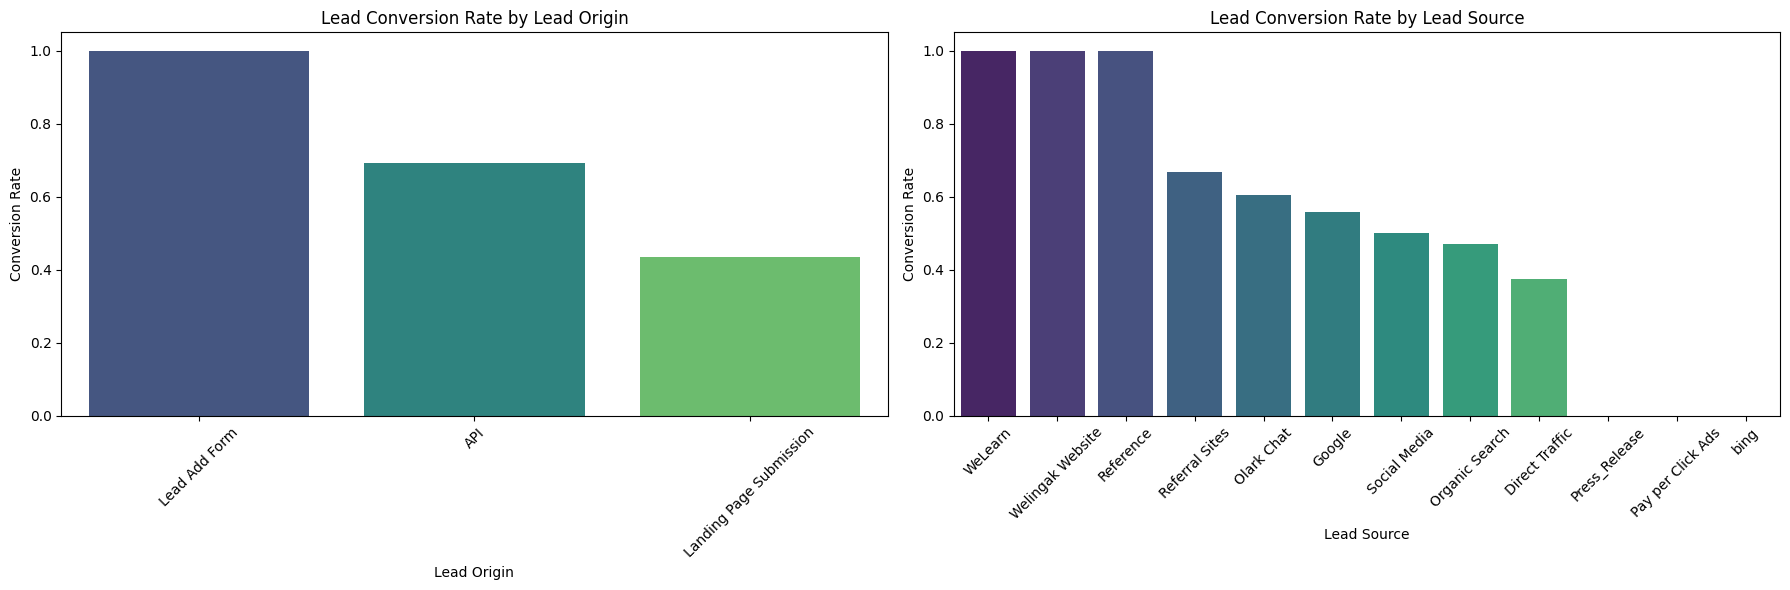

In [318]:
# Setting up the subplot for a 1x2 layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Conversions for Lead Origin
lead_origin_conversion = leads.groupby('Lead Origin')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=lead_origin_conversion.index, y=lead_origin_conversion.values, palette='viridis', ax=axes[0])
axes[0].set_title('Lead Conversion Rate by Lead Origin')
axes[0].set_xlabel('Lead Origin')
axes[0].set_ylabel('Conversion Rate')
axes[0].tick_params(axis='x', rotation=45)

# Conversions for Lead Source
lead_source_conversion = leads.groupby('Lead Source')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=lead_source_conversion.index, y=lead_source_conversion.values, palette='viridis', ax=axes[1])
axes[1].set_title('Lead Conversion Rate by Lead Source')
axes[1].set_xlabel('Lead Source')
axes[1].set_ylabel('Conversion Rate')
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Interaction with the lead through Forms is the most successful origin source, while API follows up closely. Moreover, conversion rates through websites such as WeLearn and Welingak have returned higher numbers than social media and search engines. 

##### Conversion by Demography

 investigates the conversion rates across various demographic factors, including country, city, occupation, and specialization. Understanding how these demographic attributes influence conversion can provide valuable insights into target audiences.

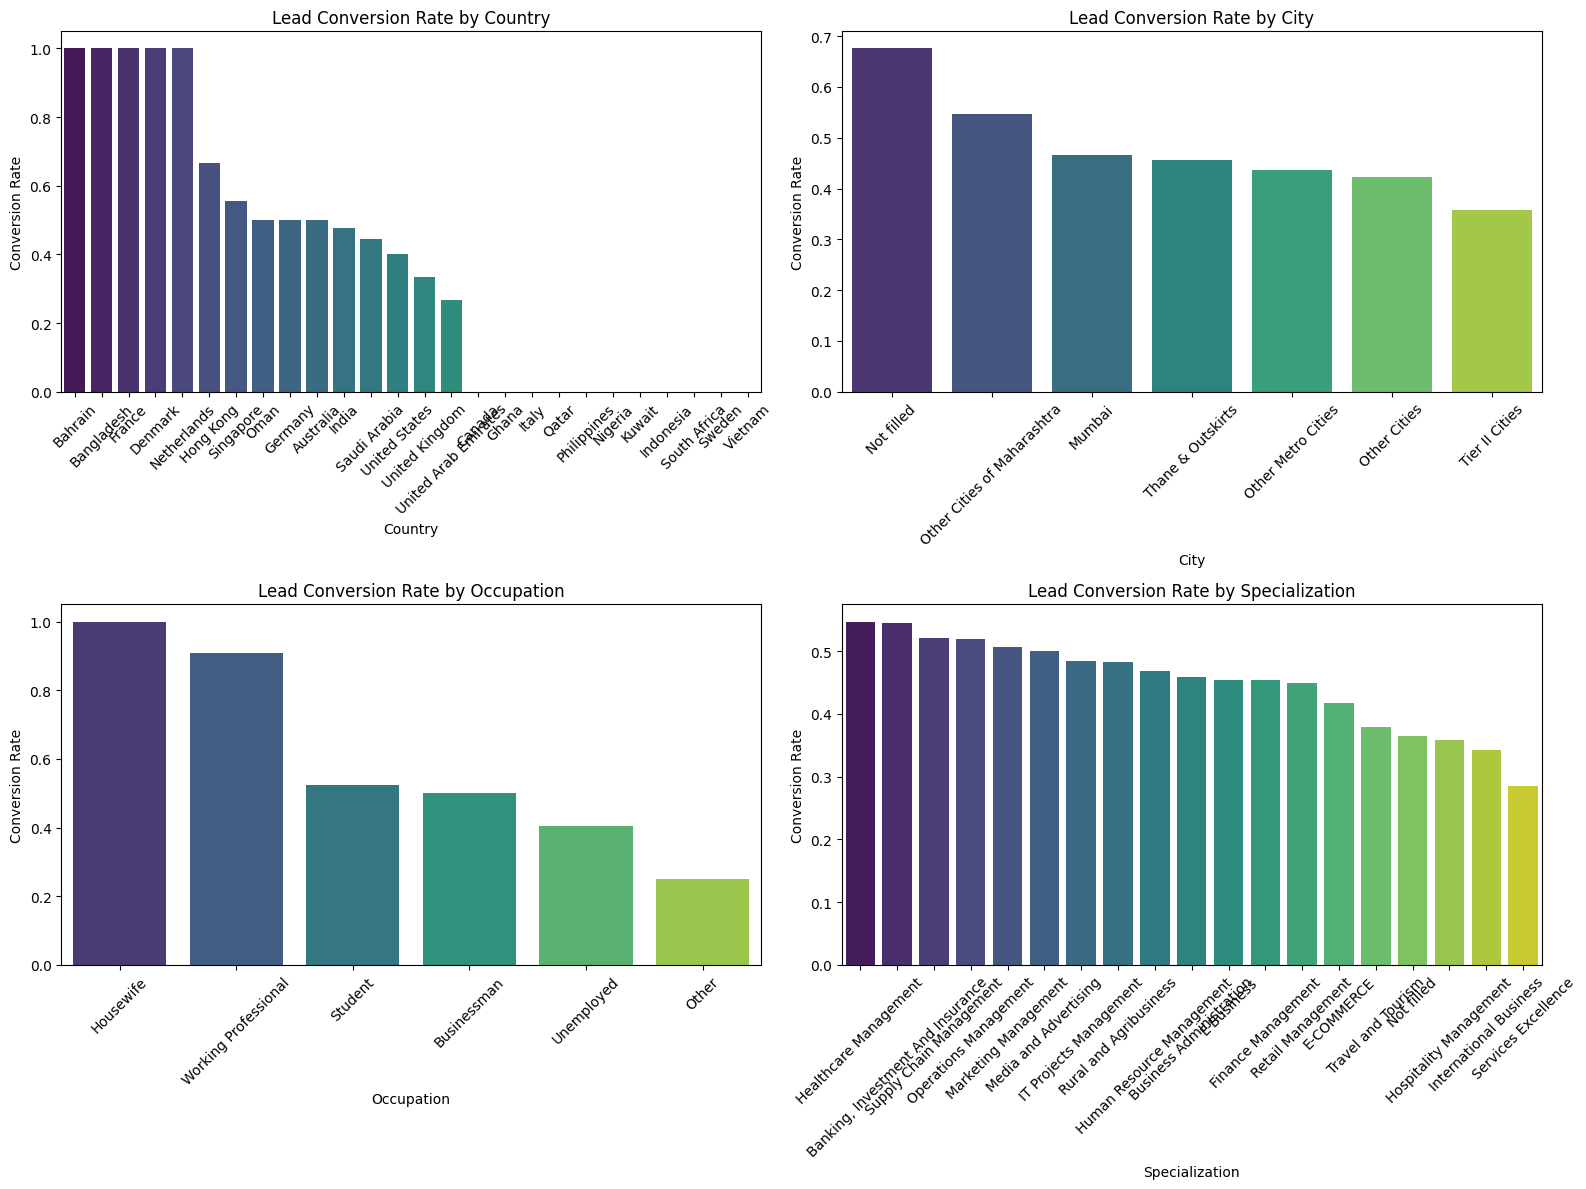

In [319]:
# Setting up the subplot for a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Conversion by Country
country_conversion = leads.groupby('Country')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=country_conversion.index, y=country_conversion.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Lead Conversion Rate by Country')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Conversion Rate')
axes[0, 0].tick_params(axis='x', rotation=45)

# Conversion by City
city_conversion = leads.groupby('City')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=city_conversion.index, y=city_conversion.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Lead Conversion Rate by City')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Conversion Rate')
axes[0, 1].tick_params(axis='x', rotation=45)

# Conversion by Occupation
occupation_conversion = leads.groupby('What is your current occupation')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=occupation_conversion.index, y=occupation_conversion.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Lead Conversion Rate by Occupation')
axes[1, 0].set_xlabel('Occupation')
axes[1, 0].set_ylabel('Conversion Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

# Conversion by Specialization
specialization_conversion = leads.groupby('Specialization')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=specialization_conversion.index, y=specialization_conversion.values, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Lead Conversion Rate by Specialization')
axes[1, 1].set_xlabel('Specialization')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Lead Conversions are higher in case of Working Professionals in the domain of Management mostly. Students and Businesspersons are less likely to engage themselves. Moreover, developing countries with lesser technological adoption such as Bahrain and Bangladesh are having highest conversions. 

##### Average Time Spent vs Conversion

This analysis explores the relationship between the average time spent on the website and the conversion rates. By examining how varying durations of engagement impact the likelihood of conversion, we can gain insights into user behavior.

Correlation between Total Time Spent on Website and Conversion: 0.471


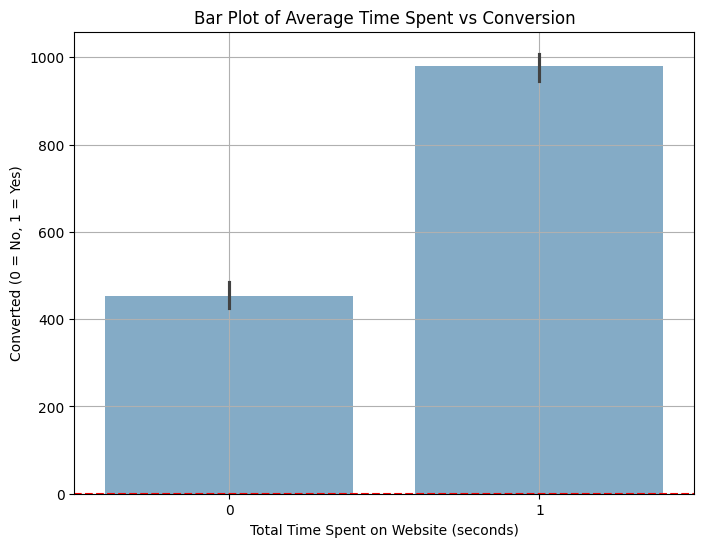

In [331]:
# Calculating the correlation between total time spent and conversion
correlation = leads['Total Time Spent on Website'].corr(leads['Converted'])
print(f"Correlation between Total Time Spent on Website and Conversion: {correlation:.3f}")

# Visualizing the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.barplot(data=leads, y='Total Time Spent on Website', x='Converted', alpha=0.6)
plt.title('Bar Plot of Average Time Spent vs Conversion')
plt.xlabel('Total Time Spent on Website (seconds)')
plt.ylabel('Converted (0 = No, 1 = Yes)')
plt.axhline(y=0.5, color='r', linestyle='--')  # Reference line for conversion
plt.grid()
plt.show()

This graph indicates that the more time a prospect sends on the website, the more likely they are to get converted. The difference is almost 1.5x between the two. 

##### Total Visits vs Conversion

We will analyze the relationship between the total number of visits and conversion rates. We will calculate the conversion rate based on total visits and visualize the average visits per conversion to identify patterns and insights.

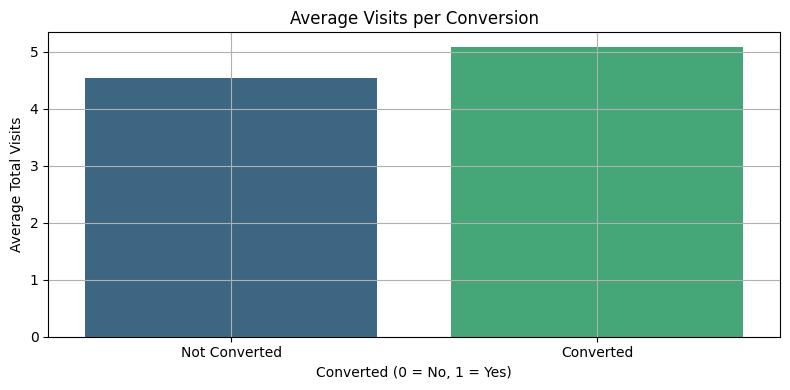

In [336]:
# Calculating average visits per conversion
average_visits_per_conversion = leads.groupby('Converted')['TotalVisits'].mean().reset_index()

# Plotting Total Visits vs Conversion
plt.figure(figsize=(8, 4))

# Plot 2: Average Visits per Conversion
sns.barplot(data=average_visits_per_conversion, x='Converted', y='TotalVisits', palette='viridis')
plt.title('Average Visits per Conversion')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Average Total Visits')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])
plt.grid()

plt.tight_layout()
plt.show()

This analysis tells us that when someone visits an average of 5 pages in a session, they are more likely to be converted, as compared to those who do not. 

##### Bounce Rate 

Bounce rate measures the percentage of visitors who navigate away from the site after viewing only one page. We will check how Bounce Rate is impacting our Conversions.  

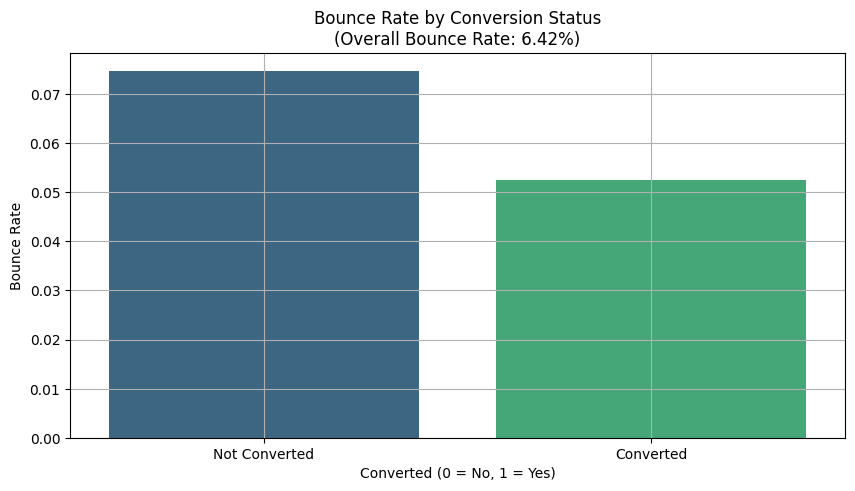

In [337]:
# Calculate Bounce Rate
leads['Bounce'] = leads['Page Views Per Visit'] <= 1
bounce_rate = leads['Bounce'].mean() * 100

# Grouping by Converted to see bounce rate comparison for converted and non-converted leads
bounce_rate_by_conversion = leads.groupby('Converted')['Bounce'].mean().reset_index()

# Plotting Bounce Rate
plt.figure(figsize=(10, 5))

# Bar plot of bounce rate by conversion
sns.barplot(data=bounce_rate_by_conversion, x='Converted', y='Bounce', palette='viridis')
plt.title(f'Bounce Rate by Conversion Status\n(Overall Bounce Rate: {round(bounce_rate, 2)}%)')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Bounce Rate')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])
plt.grid()

plt.show()

Bounce rate of 6.42% tells us that very less prospects actually spend time on a single page. Majority of prospects travel to multiple pages in our website, which is a positive sign for our traffic. 

The inverse correlation between conversion and bounce rate also tells us the same story. 

##### Conversion based on Activity

We'll analyze the conversion rates based on the activities performed with the lead. This includes `Last Activity`, `Last Notable Activity`, `Do not Email` and `Do not Call`.

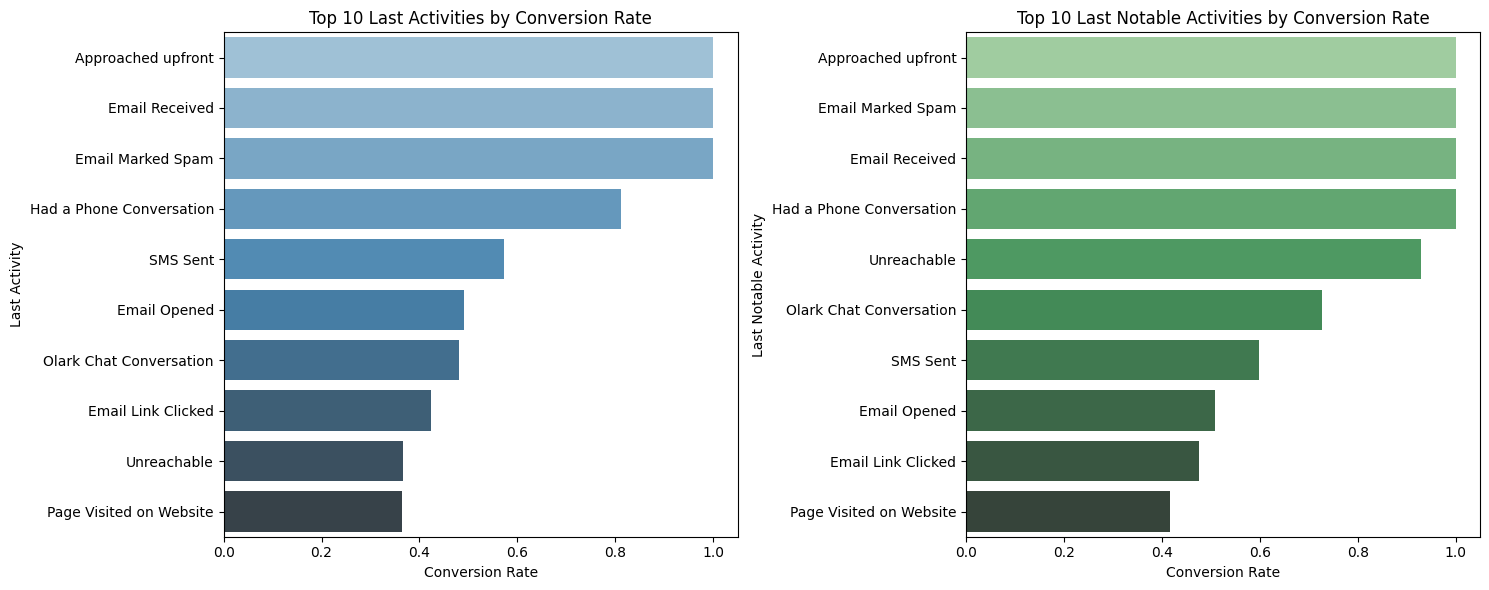

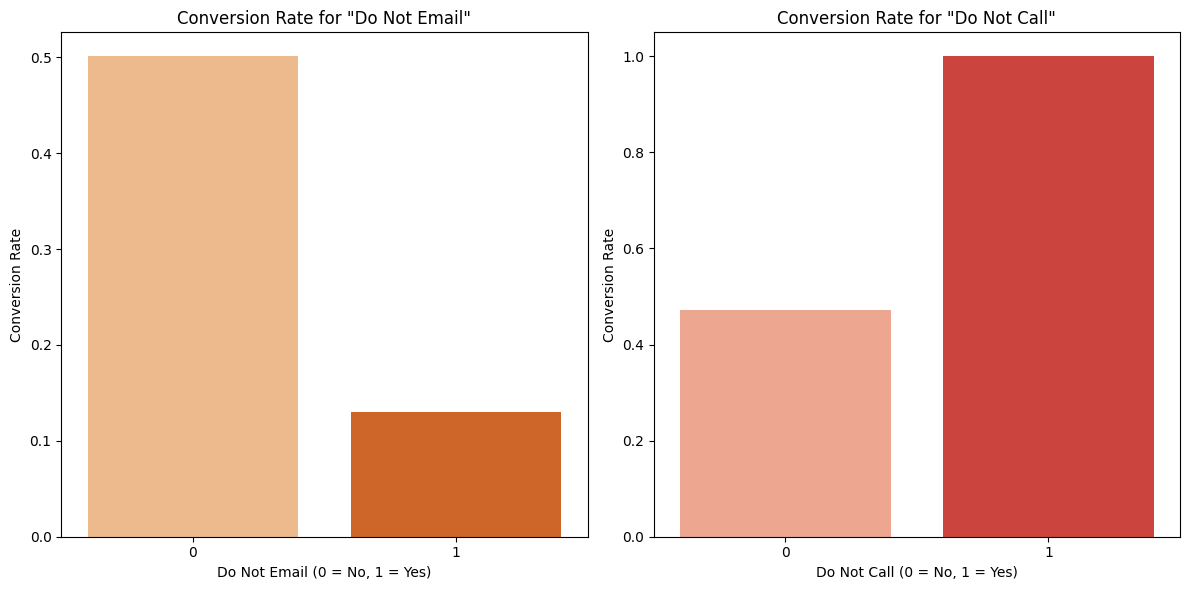

In [338]:
# Top 10 Last Activities by Conversion Rate
top_10_last_activity = leads.groupby('Last Activity')['Converted'].mean().sort_values(ascending=False).head(10).reset_index()

# Top 10 Last Notable Activities by Conversion Rate
top_10_last_notable_activity = leads.groupby('Last Notable Activity')['Converted'].mean().sort_values(ascending=False).head(10).reset_index()

# Conversion Rates for 'Do Not Email' and 'Do Not Call'
do_not_email_conversion = leads.groupby('Do Not Email')['Converted'].mean().reset_index()
do_not_call_conversion = leads.groupby('Do Not Call')['Converted'].mean().reset_index()

# Plotting Top 10 Last Activities and Last Notable Activities
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Last Activity
sns.barplot(data=top_10_last_activity, x='Converted', y='Last Activity', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Last Activities by Conversion Rate')
axes[0].set_xlabel('Conversion Rate')
axes[0].set_ylabel('Last Activity')

# Plot for Last Notable Activity
sns.barplot(data=top_10_last_notable_activity, x='Converted', y='Last Notable Activity', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Last Notable Activities by Conversion Rate')
axes[1].set_xlabel('Conversion Rate')
axes[1].set_ylabel('Last Notable Activity')

plt.tight_layout()
plt.show()

# Plotting 'Do Not Email' and 'Do Not Call' Conversion Rates
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Do Not Email
sns.barplot(data=do_not_email_conversion, x='Do Not Email', y='Converted', ax=axes[0], palette='Oranges')
axes[0].set_title('Conversion Rate for "Do Not Email"')
axes[0].set_xlabel('Do Not Email (0 = No, 1 = Yes)')
axes[0].set_ylabel('Conversion Rate')

# Do Not Call
sns.barplot(data=do_not_call_conversion, x='Do Not Call', y='Converted', ax=axes[1], palette='Reds')
axes[1].set_title('Conversion Rate for "Do Not Call"')
axes[1].set_xlabel('Do Not Call (0 = No, 1 = Yes)')
axes[1].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

These charts tell us that a lead is more likely to be converted when they are contacted either through email, or approached in person. Phone conversations come very close to the top, though, and can be considered for sure. 

The inverse relation of conversions with emails and calls tell us the same - do not call, but contact through email. 

##### Conversion based on Customer Preferences

We will analyze the conversion rates based on the preferences and influences that affect customers' decisions. This includes factors such as the most important reason for choosing a course, exposure to a newspaper article, digital advertisements, recommendations, and the offer of a free copy of "Mastering The Interview."

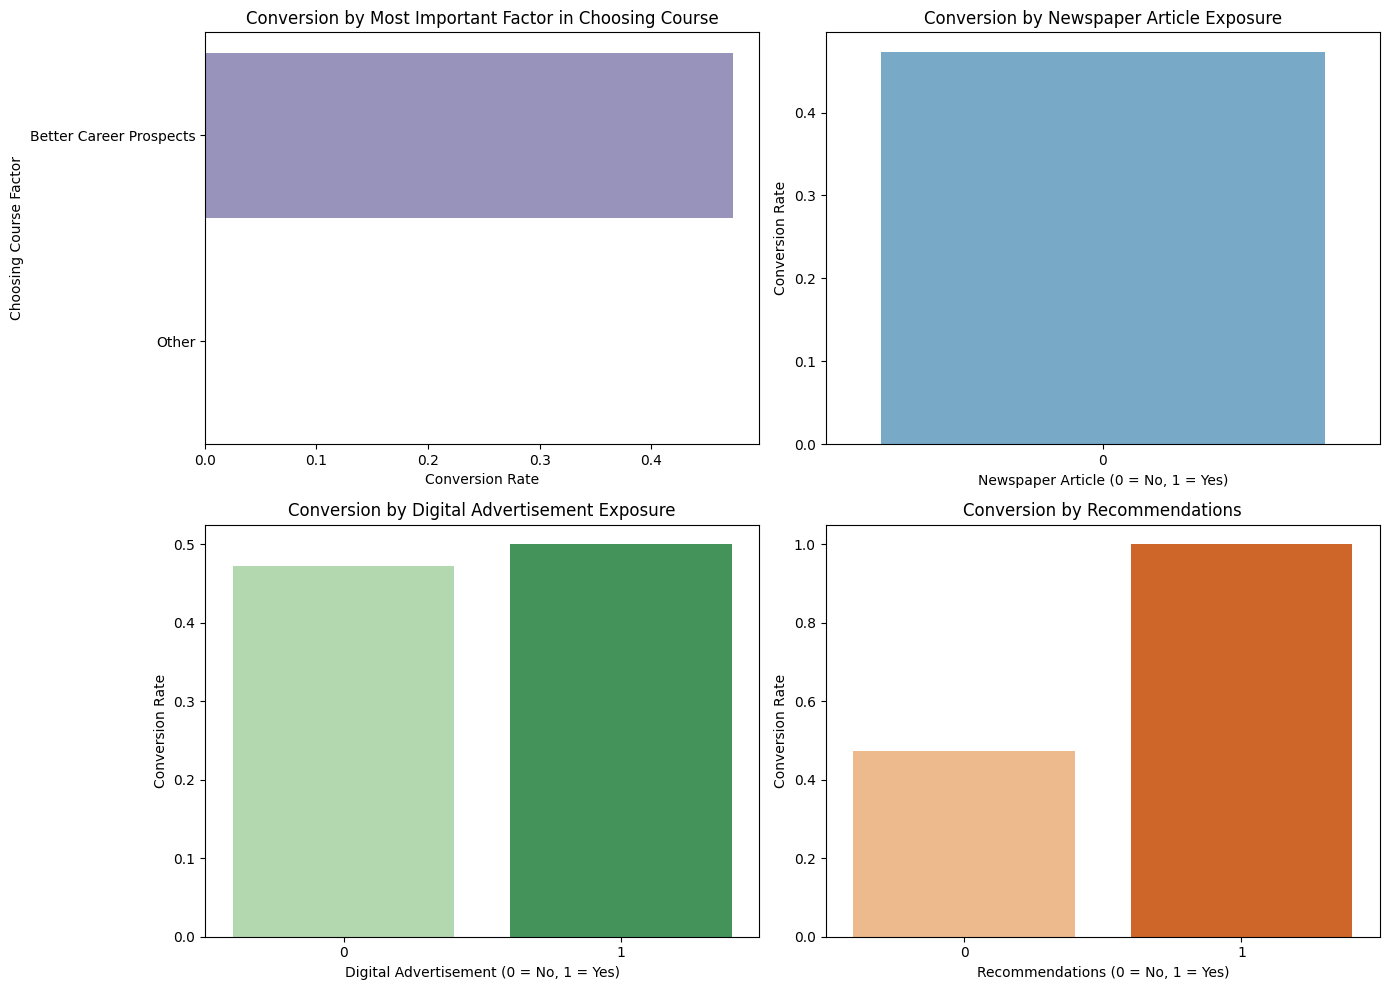

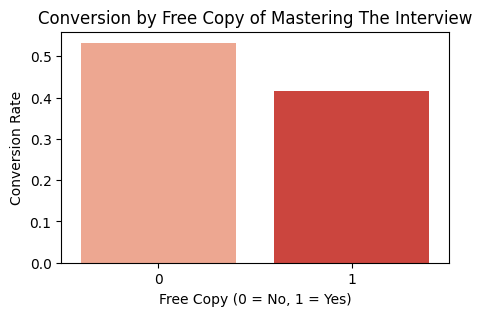

In [353]:
# Conversion Rate for 'What matters most to you in choosing a course'
conversion_choosing_course = leads.groupby('What matters most to you in choosing a course')['Converted'].mean().reset_index()

# Conversion Rate for 'Newspaper Article'
conversion_newspaper = leads.groupby('Newspaper Article')['Converted'].mean().reset_index()

# Conversion Rate for 'Digital Advertisement'
conversion_digital_ad = leads.groupby('Digital Advertisement')['Converted'].mean().reset_index()

# Conversion Rate for 'Through Recommendations'
conversion_recommendations = leads.groupby('Through Recommendations')['Converted'].mean().reset_index()

# Conversion Rate for 'A free copy of Mastering The Interview'
conversion_free_copy = leads.groupby('A free copy of Mastering The Interview')['Converted'].mean().reset_index()

# Plotting Preferences and Conversion Rates
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# What matters most in choosing a course
sns.barplot(data=conversion_choosing_course, x='Converted', y='What matters most to you in choosing a course', ax=axes[0, 0], palette='Purples_d')
axes[0, 0].set_title('Conversion by Most Important Factor in Choosing Course')
axes[0, 0].set_xlabel('Conversion Rate')
axes[0, 0].set_ylabel('Choosing Course Factor')

# Newspaper Article
sns.barplot(data=conversion_newspaper, x='Newspaper Article', y='Converted', ax=axes[0, 1], palette='Blues')
axes[0, 1].set_title('Conversion by Newspaper Article Exposure')
axes[0, 1].set_xlabel('Newspaper Article (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Conversion Rate')

# Digital Advertisement
sns.barplot(data=conversion_digital_ad, x='Digital Advertisement', y='Converted', ax=axes[1, 0], palette='Greens')
axes[1, 0].set_title('Conversion by Digital Advertisement Exposure')
axes[1, 0].set_xlabel('Digital Advertisement (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Conversion Rate')

# Through Recommendations
sns.barplot(data=conversion_recommendations, x='Through Recommendations', y='Converted', ax=axes[1, 1], palette='Oranges')
axes[1, 1].set_title('Conversion by Recommendations')
axes[1, 1].set_xlabel('Recommendations (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Conversion Rate')

# Adjust layout
plt.tight_layout()
plt.show()

# Free Copy of Mastering the Interview
plt.figure(figsize=(5,3))
sns.barplot(data=conversion_free_copy, x='A free copy of Mastering The Interview', y='Converted', palette='Reds')
plt.title('Conversion by Free Copy of Mastering The Interview')
plt.xlabel('Free Copy (0 = No, 1 = Yes)')
plt.ylabel('Conversion Rate')
plt.show()



This analysis tells us that Free Copy of Mastering the interview does not exactly have a positive impact on our lead conversion. In fact, newspaper advertisement has not converted any of its leads. Digital Ads do not seem to be very variable, while recommendations have positive relation with conversions. 

##### Conversion by Asymmetric Indices

The Asymmetric Activity Index and Asymmetric Profile Index are ordinal variables that assess the lead’s engagement and profile strength based on defined categories: 'Low', 'Medium', and 'High'. By analyzing the conversion rates for each level, we can evaluate the relationship between the lead's activity or profile index and their likelihood of converting.

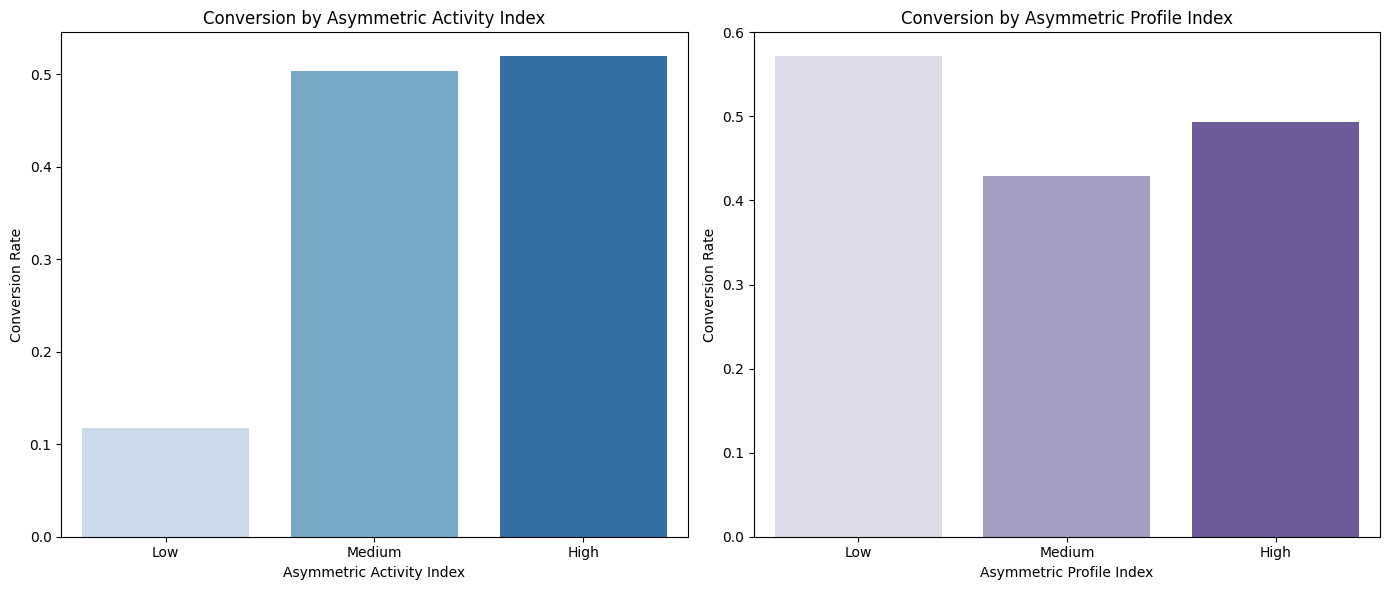

In [354]:
# Conversion Rate for 'Asymmetric Activity Index'
conversion_activity_index = leads.groupby('Asymmetrique Activity Index')['Converted'].mean().reset_index()

# Conversion Rate for 'Asymmetric Profile Index'
conversion_profile_index = leads.groupby('Asymmetrique Profile Index')['Converted'].mean().reset_index()

# Plotting Conversion by Asymmetric Indices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Asymmetric Activity Index
sns.barplot(data=conversion_activity_index, x='Asymmetrique Activity Index', y='Converted', ax=axes[0], palette='Blues')
axes[0].set_title('Conversion by Asymmetric Activity Index')
axes[0].set_xlabel('Asymmetric Activity Index')
axes[0].set_ylabel('Conversion Rate')

# Asymmetric Profile Index
sns.barplot(data=conversion_profile_index, x='Asymmetrique Profile Index', y='Converted', ax=axes[1], palette='Purples')
axes[1].set_title('Conversion by Asymmetric Profile Index')
axes[1].set_xlabel('Asymmetric Profile Index')
axes[1].set_ylabel('Conversion Rate')

# Adjust layout
plt.tight_layout()
plt.show()

This analysis tells us that as we move to a high activity index, the chances of conversion can also increase. However, it is the opposite when it comes to the profile index. 

Prospects with low profile index are more likely to get converted, and it reduces as we move towards high index. 

### Step 4: Modelling

Based on our Exploratory Data Analysis, we have selected the following features to be included in our Classification model - 

1. Lead Origin
2. Last Notable Activity
3. Tags
4. Country
5. What is your current occupation
6. Specialization
7. Through Recommendations
8. TotalVisits
9. Total Time Spent on Website
10. Page Views Per Visit
11. Asymmetrique Activity Index
12. Asymmetrique Profile Index
13. Newspaper Article
14. Do not Email
15. Do not Call
16. What matters most to you in choosing a course

Let us start Pre-processing now. For this, we will define a new dataframe lead_model, in which training and testing will occur. 

#### 4.1. Pre-Processing

We will start with removing unnecessary columns from the dataset. We have selected 16 features based on our EDA. Let us start now. 

In [361]:
features = ['Lead Origin','Last Notable Activity','Tags','Country',
            'What is your current occupation','Specialization','Through Recommendations',
            'TotalVisits','Total Time Spent on Website','Page Views Per Visit',
            'Asymmetrique Activity Index','Asymmetrique Profile Index','Newspaper Article',
            'Do Not Email','Do Not Call','What matters most to you in choosing a course']

features

['Lead Origin',
 'Last Notable Activity',
 'Tags',
 'Country',
 'What is your current occupation',
 'Specialization',
 'Through Recommendations',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Newspaper Article',
 'Do Not Email',
 'Do Not Call',
 'What matters most to you in choosing a course']

In [368]:
lead_model = leads[features+['Converted']]
lead_model

,Lead Origin,Last Notable Activity,Tags,Country,What is your current occupation,Specialization,Through Recommendations,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Newspaper Article,Do Not Email,Do Not Call,What matters most to you in choosing a course,Converted
2,Landing Page Submission,Email Opened,Will revert after reading the email,India,Student,Business Administration,0,2.0,1532,2.00,Medium,High,0,0,0,Better Career Prospects,1
3,Landing Page Submission,Modified,Ringing,India,Unemployed,Media and Advertising,0,1.0,305,1.00,Medium,High,0,0,0,Better Career Prospects,0
4,Landing Page Submission,Modified,Will revert after reading the email,India,Unemployed,Not filled,0,2.0,1428,1.00,Medium,High,0,0,0,Better Career Prospects,1
6,Landing Page Submission,Modified,Will revert after reading the email,India,Unemployed,Supply Chain Management,0,2.0,1640,2.00,Medium,High,0,0,0,Better Career Prospects,1
10,Landing Page Submission,Email Opened,Will revert after reading the email,India,Unemployed,Travel and Tourism,0,8.0,1351,8.00,Medium,Medium,0,0,0,Better Career Prospects,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Modified,Will revert after reading the email,India,Unemployed,Business Administration,0,5.0,210,2.50,Medium,High,0,0,0,Better Career Prospects,1
9235,Landing Page Submission,Email Marked Spam,Will revert after reading the email,Saudi Arabia,Unemployed,IT Projects Management,0,8.0,1845,2.67,Medium,High,0,1,0,Better Career Prospects,1
9236,Landing Page Submission,SMS Sent,wrong number given,India,Unemployed,Media and Advertising,0,2.0,238,2.00,Medium,High,0,0,0,Better Career Prospects,0
9237,Landing Page Submission,SMS Sent,invalid number,India,Unemployed,Business Administration,0,2.0,199,2.00,Medium,High,0,1,0,Better Career Prospects,0


Great. Now, let us define our predictor (X) and estimator (Y) variables for the modelling. Let us do it now. 

In [377]:
Y = lead_model['Converted']
X = lead_model.loc[:,lead_model.columns!='Converted']

Now, it is time to differentiate the categorical and numerical features. Let us do it. 

In [378]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 2 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    2135 non-null   object  
 1   Last Notable Activity                          2135 non-null   object  
 2   Tags                                           2135 non-null   object  
 3   Country                                        2135 non-null   object  
 4   What is your current occupation                2135 non-null   object  
 5   Specialization                                 2135 non-null   object  
 6   Through Recommendations                        2135 non-null   int64   
 7   TotalVisits                                    2135 non-null   float64 
 8   Total Time Spent on Website                    2135 non-null   int64   
 9   Page Views Per Visit                          

In [379]:
numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
binary = ['Through Recommendations','Newspaper Article','Do Not Email','Do Not Call']
category = ['Lead Origin','Last Notable Activity','Tags','Country',
            'What is your current occupation','Specialization','What matters most to you in choosing a course',
            'Asymmetrique Activity Index','Asymmetrique Profile Index']

Finally, now it is time to prepare the data for Modelling. 

#### 4.2. Modelling

Now, let us import the necessary libraries for preparing data and pipeline formation. We will use the `sklearn` library for this purpose. 

In [381]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

##### 4.2.1. Scaling and Pipeline Creation

We will start with scaling our data. Let us build the pre-processor for this purpose. It will then lead to the pipeline creation for Logistic Regression model. 

In [396]:
# Define the preprocessor with different transformations for numeric, binary, and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),  # Scale only non-binary numeric features
        ('bin', 'passthrough', binary),  # Pass binary features through without any transformation
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), category)  # One-hot encode categorical features
    ])

#creating pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

Great! Now, it is time to prepare the data using Training and Testing split of data. Let us do that. 

##### 4.2.2. Splitting Data to Training and Testing Data

Now, let us split both our data - X and Y - into training and test data sets. The training sets will be used to train the model to the data, and the test set will be used to evaluate the model. 

In [397]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [398]:
display(X_train.shape,Y_train.shape)

(1387, 16)

(1387,)

In [399]:
display(X_test.shape,Y_test.shape)

(748, 16)

(748,)

Great! The splitting is done. Now, it is time to start implementing the model, by running it through the pipeline. Let us do it now. 

##### 4.2.3. Model Implementation

We will start by fitting the training data into the pipeline and examining its results. Let us start. 

In [400]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TotalVisits',
                                                   'Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit']),
                                                 ('bin', 'passthrough',
                                                  ['Through Recommendations',
                                                   'Newspaper Article',
                                                   'Do Not Email',
                                                   'Do Not Call']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Lead Origin',
                                                   'Last Notable Activity',
                                                   'Tags', 'Country',
                                                   'What is your current '
                                                   'occupation',
                                                   'Specialization',
                                                   'What matters most to you '
                                                   'in choosing a course',
                                                   'Asymmetrique Activity '
                                                   'Index',
                                                   'Asymmetrique Profile '
                                                   'Index'])])),
                ('classifier', LogisticRegression(random_state=42))])

Great! Next step is to make our predictions using the test set. 

In [401]:
y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

Our predictions are ready ! Now, it is time to evaluate our model. 

##### 4.2.4. Model Evaluation

In [402]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, pipeline.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[375  19]
 [ 12 342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       394
           1       0.95      0.97      0.96       354

    accuracy                           0.96       748
   macro avg       0.96      0.96      0.96       748
weighted avg       0.96      0.96      0.96       748

ROC AUC Score: 0.9842338466833004


**Interpretation** - 

1. Accuracy (96%): The model is very accurate overall, correctly predicting 96% of the instances.
2. Precision and Recall (Both ~96%): The model is well-balanced between precision and recall for both classes, meaning it performs equally well in both identifying true positives and avoiding false positives.
3. F1-Score (0.96): The harmonic mean of precision and recall is high, reflecting a balanced performance.
4. ROC AUC (0.984): The model is excellent at distinguishing between the two classes, almost near perfect performance. 

Overall, our Logistic Regression model is giving a very strong result. 

### Step 5: Conclusions

The conclusions will be summarized in 2 parts - EDA and Modelling. Let us prepare this conclusion.  

**Exploratory Analysis Outcomes**

1. The overall lead conversion so far has been 47.1%. The analysis suggests that leads tagged with high-intent indicators (like 'Closed by Horizzon' or 'Interested in Next batch') are more likely to convert.
2. Channels like Websites and References have led to the most conversions (>90%), while social media and search engines like google came up far second (60-70%).
3. Developing countries with lesser technology adaptibility such as Bahrain and Bangladesh dominate the successful conversions demographics, while Working Professionals in the field of Management also carry the same weightage. 
4. Successful conversions have spent an average of 1.5x time of the unsuccessful conversions on the website. Moreover, a low bounce rate (6.42%) indicates that once anyone enters the website, they are more likely to explore it beyond the first few webpages. 
5. A lead is more likely to be converted when contacted either via email or by phone. The data also indicates that prospects prefer email communication over calls. 
6. A positive correlation could be observed as we moved towards a higher activity index for a prospect, but it was the opposite when it came to profile index. 

**Model Outcomes**

1. This classification model can be deployed to help the business accurately predict outcomes (e.g., lead conversion) with 96% accuracy.
2. The high precision and recall for both classes ensure that the model minimizes both false positives (incorrectly predicting a lead would convert) and false negatives (missing out on actual lead conversions).
3. A high ROC AUC score indicates the model can strongly differentiate between both classes, further enhancing its performance. 

***For future, the advent of overfitting and collinearity can be explored to further enhance the model's performance for the business.***

## THANK YOU !

Yash Jain, MBA <br>
BI & DA Professional